# Домашние задания четвертого урока.

**1. В переменной df находится датафрэйм. Запишите в переменную  df_shape строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:**

'df has y rows and x columns'

**где y — число строк, а x — число колонок.**

In [4]:
#df_shape='df has {} rows and {} columns'.format(df.shape[0], df.shape[1])
df_shape=f'df has {df.shape[0]} rows and {df.shape[1]} columns'

'df has 800 rows and 12 columns'

**2. Сохраните в переменную na_number серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит. Например, для такого датафрейма:**
![](https://ucarecdn.com/e1075ffd-190a-4019-a1fa-456e4b26bb8a/)
Ответ будет:
![](https://ucarecdn.com/63f7129e-9e87-4437-b9e5-b267258ad5f2/)
Note: датафрейм уже лежит в переменной **df**

In [1]:
import pandas as pd
df = pd.read_csv('pokemon_data.csv')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**3. Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.**

In [ ]:
df_types = df.dtypes

**4. Внезапно оказалось, что в колонке age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.**

In [ ]:
df['age'] = df.astype({'age': 'int'})
#или
df['age'] = df.age.astype('int')

**5. Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.**

In [ ]:
df = df.drop(columns=['age', 'sex'])

**6. А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id. Сохраните в переменную df датафрейм, в котором не будет дубликатов по колонке client_id, оставив первую строку с id**

In [ ]:
#df.client_id.loc[df.client_id.duplicated()]
#df.client_id.duplicated().any()
df = df.drop_duplicates(subset='client_id)')

**7. А сейчас ненадолго вернемся к чистому Python.**

**В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. Если вам попался 0, то нужно прекратить этот цикл.**

**Например,**

numbers = [1, -2, 3, 0, -3, 2]

**Тогда positive_numbers должен быть:**

positive_numbers = [1, 3]

Hint: список numbers  уже создан.

In [1]:
n = [1, -2, 3, 0, -3, 2]
p = []
for i in n:
    if i == 0:
        break
    elif i > 0:
        p.append(i)
p

[1, 3]

**8. Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!**

**Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.**

**Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type).**

Полезная ссылка: [pd.to_datetime()](https://lab.karpov.courses/learning/88/module/1103/lesson/9729/28503/133123/)

In [2]:
import pandas as pd
df=pd.read_csv('uber_peru_2010.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'],
              dayfirst=True) 
# taxi['start_at'] = pd.to_datetime(taxi['start_at'])
# taxi['end_at'] = pd.to_datetime(taxi['end_at'])
# taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])
df = df.query("start_type == 'asap' or start_type == 'reserved'")
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0


**9. ⭐️Задание со звёздочкой!⭐️**

**Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.**

**Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]').**

Полезная ссылка: 
[Подробнее об astype](https://lab.karpov.courses/learning/88/module/1103/lesson/9729/28503/133118/)

**Данные загружены в taxi и отфильтрованы, как в 8 шаге.**

In [3]:
import numpy as np

df['wait_time']=df.arrived_at-df.start_at
df['wait_time']=df.wait_time/ np.timedelta64(1, 'm')#.astype('timedelta64[m]')
df['wait_time']=df.wait_time.astype('timedelta64[m]')
df.wait_time

0         0 days 00:18:00
1                     NaT
2                     NaT
3                     NaT
4       -1 days +23:55:00
               ...       
23106     0 days 00:00:00
23107     0 days 00:13:00
23108     0 days 00:09:00
23109   -1 days +23:53:00
23110                 NaT
Name: wait_time, Length: 23091, dtype: timedelta64[s]

**10. ⭐️Задание со звёздочкой!⭐️**

**Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.**

**Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз**

In [190]:
#df.query('start_type == "reserved"' and 'wait_time > 0.0').groupby('driver_id').count().idxmax()
df.loc[(df.start_type == 'reserved') & (df.wait_time > np.timedelta64(0, 'm'))].driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

**11. Подумайте, что может влиять на число опозданий из прошлого задания 🤔**

* **Число взятых заказов**
* **Пунктуальность водителя**
* Поставленная водителем оценка клиента
* Цвет машины

In [223]:
#топ 101 по числу заказов
a=df.value_counts('driver_id')[0:50].reset_index()
a.head()
#наш водитель на 3-ей позиции
#получается он один из самых занятых

,driver_id,count
0,c814db2127582cf95dea1f74f43127c2,1523
1,d665fb9f75ef5d9cd0fd89479380ba78,1225
2,ff5c924e0b630fd7c019a4234059fdf4,1111
3,406921adcca37705ef527b4246c0cfea,1075
4,ec84a73745199ff840ecafcb924383ad,974


In [224]:
b=df.loc[(df.start_type == 'reserved') & (df.wait_time > np.timedelta64(0, 'm'))] \
.driver_id.value_counts()[0:50]
b

driver_id
406921adcca37705ef527b4246c0cfea    67
d665fb9f75ef5d9cd0fd89479380ba78    59
ec84a73745199ff840ecafcb924383ad    57
56f59b58bcbbd1cdabc3652e713134c2    51
c814db2127582cf95dea1f74f43127c2    45
ff5c924e0b630fd7c019a4234059fdf4    42
ab581e277813d5d9ff98d03b1c96a13f    42
ae06c34243f741e203e97c48ebcbd9da    37
eef4aeee867d60d44e1d077d16054b6a    37
6e168888d1ec73590b7ea371548757b5    35
b66c43e298753a3d39220e53008a4325    33
e84fda9c5df33f03c89b6923c361fb35    28
406921adcca37705ef527b4246bbbff5    26
406921adcca37705ef527b4246c19db3    23
8ff94ac5183d99dc41b042ad5cb1e655    20
baacf396f773709519bbde35a5eab861    19
d04f1a596fe4a582f48e6eb2f9e8f617    19
40187316352d2c03ddc19e9c8ad7c514    18
3abce16ea601affbeae8f50584ce72ef    18
583949a89a9ee17d19e3ca4f137b6b4c    18
c814db2127582cf95dea1f74f4337bc0    16
593ae49af455f324457edc1472aee6ad    14
9653e4379509630affa82d7744c825ec    14
ccfcfc81abe6485b505ba742749e61aa    13
23d3dae9d68c241a9b591f35ee5b18cd    12
b66c43e298753a3

In [226]:
a.merge(b, on='driver_id', how='inner')#.shape
#топ опаздывающих на 36 из 51 совпадает с топом загруженных
#и загрузка пропорциональна опозданиям

,driver_id,count_x,count_y
0,c814db2127582cf95dea1f74f43127c2,1523,45
1,d665fb9f75ef5d9cd0fd89479380ba78,1225,59
2,ff5c924e0b630fd7c019a4234059fdf4,1111,42
3,406921adcca37705ef527b4246c0cfea,1075,67
4,ec84a73745199ff840ecafcb924383ad,974,57
5,ab581e277813d5d9ff98d03b1c96a13f,865,42
6,406921adcca37705ef527b4246bbbff5,750,26
7,d04f1a596fe4a582f48e6eb2f9e8f617,633,19
8,40187316352d2c03ddc19e9c8ad7c514,624,18
9,e84fda9c5df33f03c89b6923c361fb35,604,28


In [ ]:
#как измерить пунктуальность?
#доля опозданий среди всех поездок в которых можно было опоздать

In [216]:
c = df.loc[(df.start_type == 'reserved') & (df.wait_time > np.timedelta64(0, 'm'))] \
.value_counts('driver_id')
d = df[df.driver_id.isin(list(c.index))] \
    .loc[df.start_type == 'reserved'].value_counts('driver_id')
e = c/d #merge не нужен, пандас и так сопоставляет id
e.describe()

count    105.000000
mean       0.220206
std        0.167542
min        0.024390
25%        0.125000
50%        0.173913
75%        0.263158
max        1.000000
Name: count, dtype: float64

In [174]:
e['406921adcca37705ef527b4246c0cfea']

0.18457300275482094

In [229]:
#пунктуальность немного лучше среднего cреди опаздывающих
#у остальных водителей пунткуальность идеальна share==0
#таких водителей не мало - 
#40 идеальнопунктуальных vs 105 опаздывающих
df[(df.start_type == 'reserved') & ~df.driver_id.isin(list(c.index))] \
.driver_id.unique().shape

(40,)

In [197]:
f = pd.concat([e, pd.DataFrame([0]*40)])
f.describe()
#наш водитель близок к средней пунктуальности

,0
count,145.000000
mean,0.159459
std,0.173283
min,0.000000
25%,0.000000
50%,0.130841
75%,0.233333
max,1.000000


<Axes: xlabel='count_x'>

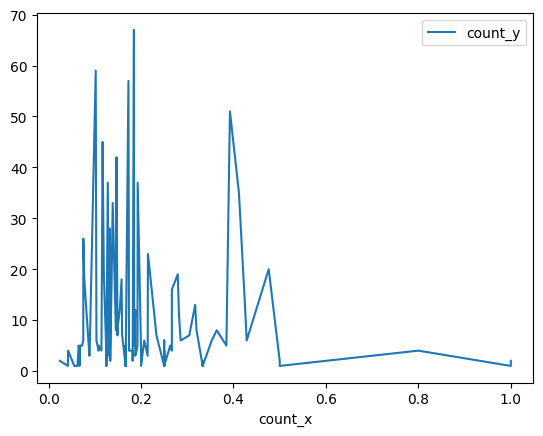

In [239]:
# e2 = pd.concat([e, pd.DataFrame([0]*40)]).reset_index()
# c2 = pd.concat([c, pd.DataFrame([0]*40)]).reset_index()
ee = e.reset_index().merge(c, on='driver_id', how='inner') 
ee.sort_values('count_x').plot('count_x', 'count_y')

In [ ]:
#пунктуальность растет от 1.0 к 0.0 
#большинство опозданий сделано среднепунктуальными (0.024-0.200)
#возможно тк самых непунктуальных уволили в какой то момент

#внутри опаздывающих нету тренда корреляции
#получается наша шкала пунктуальности работает дискретно
#share == 0 соотв 0 опозданий
#share != 0 соотв случайному числу опозданий 1-67
#100% вывод я не могу сделать таким образом
#сначала бы статистику пройти
#а в условии 100% и не спрашивают
#!!видно, что влияние пунктуальности возможно

#наша шкала пунктуальности не учитывает насколько опоздания...

In [ ]:
#--Поставленная водителем оценка клиента
#--Цвет машины
#можно найти взаимосвязи/кореляции, 
#но не думаю что в них будет смысл

**12. ⭐️Задание со звёздочкой!⭐️**

**Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели.**

Полезные ссылки:

* [как](https://lab.karpov.courses/learning/88/module/1103/lesson/9729/28503/133123/) извлечь нужное значение из даты?

* **.dt.strftime('%A')** – извлечь день недели в формате названия

**Данные загружены в taxi и отфильтрованы, как в 8 шаге.**

In [240]:
df['month'] = df.start_at.dt.month
df['weekday'] = df.start_at.dt.day_name()
df[['start_at', 'month', 'weekday']].head()

,start_at,month,weekday
0,2010-11-16 16:44:00,11,Tuesday
1,2010-06-01 00:34:00,6,Tuesday
2,2010-05-31 05:01:00,5,Monday
3,2010-06-01 00:29:00,6,Tuesday
4,2010-09-11 23:55:00,9,Saturday


**13. ⭐️Задание со звёздочкой!⭐️**

**Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина.**

**Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8).** 

Полезная ссылка: [sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) 

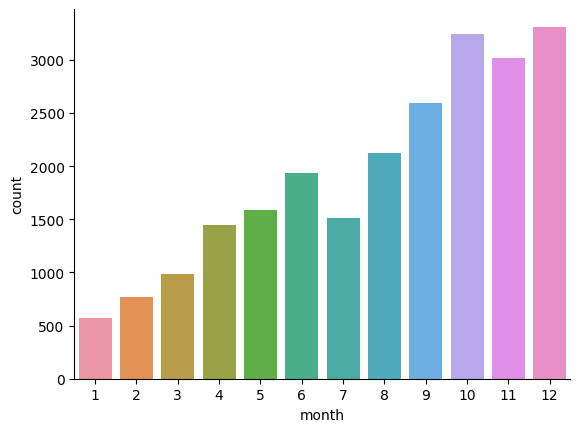

In [242]:
import seaborn as sns
sns.countplot(data=df, x='month')
sns.despine()

**14. ⭐️Задание со звёздочкой!⭐️**

**А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например:**

sns.countplot(data['column'], order=['One', 'Two', 'Three'])

**Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме.**

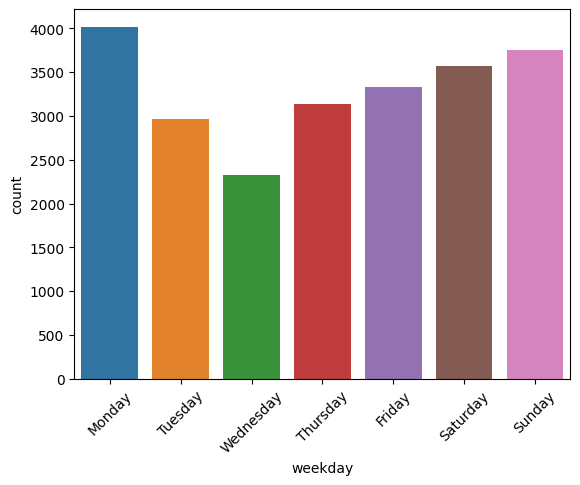

In [244]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.countplot(data=df, x='weekday', order=order)
ax.tick_params(axis='x', rotation=45)

**15. ⭐️Задание со звёздочкой!⭐️**

Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

* DAU (daily active users) – число уникальных пользователей за день
* WAU (weekly active users) – число уникальных пользователей за неделю
* MAU (monthly active users) – число уникальных пользователей за месяц

**Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения.**

Могут пригодиться:

* groupby – группировка
* nunique – число уникальных значений
* plot.line – линейная диаграмма

* Летом наблюдался спад числа уникальных пользователей в месяц
* **В течение всего года число уникальных пользователей увеличивалось**
* Число уникальных юзеров в течение года как увеличивалось, так и уменьшалось
* **MAU за апрель примерно в 2.5 раза больше, чем за январь**

In [247]:
mau = df.groupby('month').user_id.nunique()
mau

month
1     102
2     110
3     162
4     253
5     275
6     309
7     318
8     377
9     416
10    437
11    504
12    569
Name: user_id, dtype: int64

<Axes: xlabel='month', ylabel='user_id'>

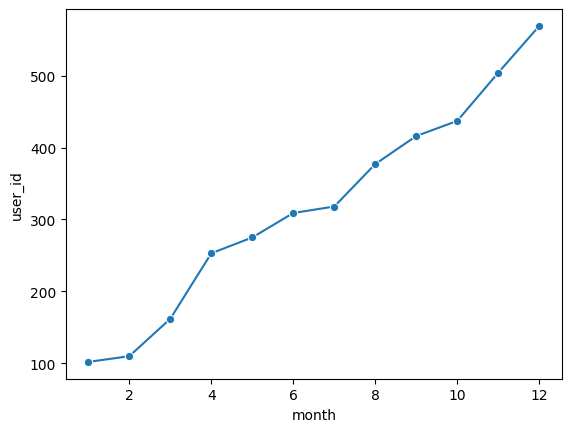

In [248]:
sns.lineplot(data=mau, marker='o')